In [1]:
import pandas as pd

In [118]:
#tsv 파일 로드
chipo = pd.read_csv("../csv/num_1/chipotle.tsv", sep = "\t")
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


1. order_id 컬럼은 숫자 의미를 가지지 않기 때문에 문자형으로 변경
2. 가장 많이 주문한 item_name과 수량 출력
3. item당 주문 총량을 구하고  바형 그래프로 시각화
4. itme_price를 float형태로 변환
5. 주문당 평균 계산 금액 출력
6. 각 아이템의 가격을 출력한 후에 가격분포 그래프 그리기/ 가격 히스토그램 그리기
7. "chicken Bowl" 2개 이상 주문한 고객들의 메뉴의 총 주문 수량을 출력

In [119]:
# 데이터 문자열 변환 -- astype() 함수
chipo["order_id"] = chipo["order_id"].astype(str)
name = chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   object
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(1), object(4)
memory usage: 180.7+ KB


In [120]:
chipo['item_name'].value_counts() #주문 1번에 count를 1씩 한 값

Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Steak Bowl                               211
Chips                                    211
Bottled Water                            162
Chicken Soft Tacos                       115
Chips and Fresh Tomato Salsa             110
Chicken Salad Bowl                       110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48
Chicken Cr

### tolist() : 데이터프레임 값을 리스트로 만들기
- val_list   = df1.values.tolist() 
- col_val_list = df1['col1'].values.tolist()
- col_list1   = df1.columns.tolist() : index 타입에 사용하면 반환 타입은 list
- col_list2  = df1.columns.values.tolist()

In [121]:
#주문 횟수가 가장 많은 메뉴를 출력
#chipo['item_name'].value_counts() -> item_name 별 count
#chipo['item_name'].value_counts().index -> 그거의 인덱스니까 itemname들
chipo['item_name'].value_counts().index.tolist()[0] 
# item_name 들을 리스트화 한 뒤 0번째 값(가장 많은 메뉴) 출력

'Chicken Bowl'

In [122]:
#item_name의 주문 총량
item_quantity = chipo.groupby("item_name").sum()["quantity"]

In [123]:
import matplotlib.pyplot as plt
import numpy as np

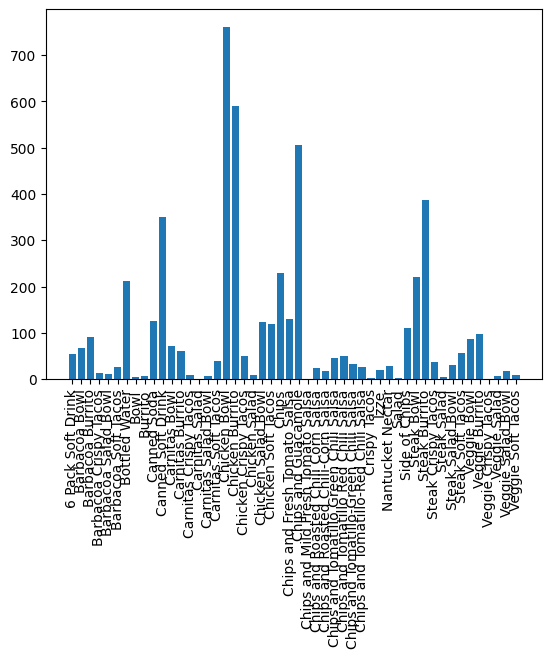

In [124]:
x = item_quantity.index
y = item_quantity

plt.bar(x, y)
plt.xticks(rotation=90)
plt.show()

### item_price 앞 $를 제거하고 float로 변환시키기

In [125]:
##case1
chipo['item_price'] = chipo['item_price'].str.replace("$", "").astype(float)

##case2
#chipo["item_price"].str.lstrip('$').astype(float)

##case3
#chipo['item_price'].apply(lambda x : float(x.replace("$","")))
##case4
#def change(x):
    #result = float(x.replace("$",""))
    #return result
#chipo["item_price"].apply(change)

C:\Users\chk\AppData\Local\Temp\ipykernel_21608\339449620.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  chipo['item_price'] = chipo['item_price'].str.replace("$", "").astype(float)


In [126]:
chipo.describe()
#chipo.head(10)

,quantity,item_price
count,4622.000000,4622.000000
mean,1.075725,7.464336
std,0.410186,4.245557
min,1.000000,1.090000
25%,1.000000,3.390000
50%,1.000000,8.750000
75%,1.000000,9.250000
max,15.000000,44.250000


In [127]:
#수량이 1개인 데이터를 출력
chipo[chipo["quantity"] == 1]
chipo_one_item = chipo.query("quantity == 1")

In [128]:
## item_name을 기준으로 그룹화 하고 item_price의 최솟값을 구하면 아이템당 가격을 추출
price_per_item = chipo_one_item.groupby('item_name').min()
price_per_item

,order_id,quantity,choice_description,item_price
item_name,,,,
6 Pack Soft Drink,1076,1,[Coke],6.49
Barbacoa Bowl,1000,1,"[Fresh Tomato (Mild), [Lettuce, Black Beans, R...",8.69
Barbacoa Burrito,1002,1,"[Fresh Tomato (Mild), [Black Beans, Rice, Sour...",8.69
Barbacoa Crispy Tacos,110,1,"[Fresh Tomato Salsa, Guacamole]",8.99
Barbacoa Salad Bowl,1283,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Barbacoa Soft Tacos,1103,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99
Bottled Water,1009,1,NaN,1.09
Bowl,279,1,"[Adobo-Marinated and Grilled Steak, [Sour Crea...",7.40
Burrito,214,1,"[Adobo-Marinated and Grilled Chicken, Pinto Be...",7.40


In [129]:
## item당 가격이 큰것부터 상위 10개를 출력?
price_per_item.sort_values('item_price', ascending=False).head(10)

#price_per_item.sort_values('item_price', ascending=False)[:10]

,order_id,quantity,choice_description,item_price
item_name,,,,
Steak Salad Bowl,1032,1,"[Fresh Tomato Salsa, Lettuce]",9.39
Barbacoa Salad Bowl,1283,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Carnitas Salad Bowl,1035,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",9.39
Carnitas Soft Tacos,1011,1,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.99
Carnitas Crispy Tacos,1774,1,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.99
Steak Soft Tacos,1054,1,"[Fresh Tomato Salsa (Mild), [Cheese, Sour Cream]]",8.99
Carnitas Salad,1500,1,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.99
Carnitas Bowl,1007,1,"[Fresh Tomato (Mild), [Guacamole, Lettuce, Ric...",8.99
Barbacoa Soft Tacos,1103,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99


### Bar graph, Histogram

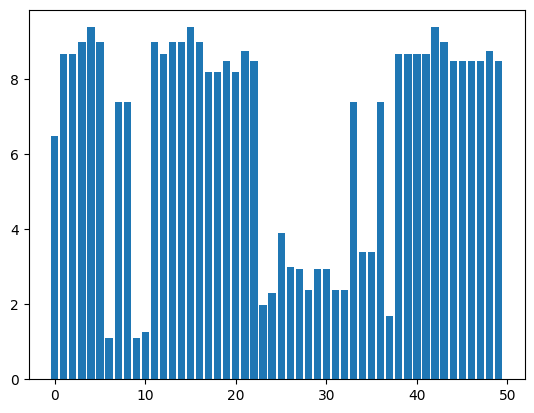

In [130]:
## 아이템 가격 분포 그래프 출력
## 바형 그래프 
x = price_per_item.index
x_pos = np.arange(len(x))
y = price_per_item['item_price']

plt.bar(x_pos, y)
plt.show()

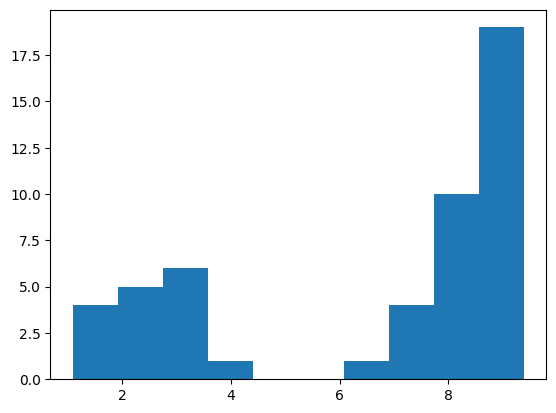

In [131]:
## 히스토그램 출력
plt.hist(y)
plt.show()

In [133]:
# "chicken bowl"을 2개 이상 주문한 고객들의 'chicken bowl' 메뉴의 총 주문 수량

## chicken bowl 만 출력
chipo_chicken = chipo[chipo["item_name"] == 'Chicken Bowl']
len(chipo_chicken)

726

In [137]:
chipo_chicken

,order_id,quantity,item_name,choice_description,item_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
19,10,1,Chicken Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",8.75
26,13,1,Chicken Bowl,"[Roasted Chili Corn Salsa (Medium), [Pinto Bea...",8.49
...,...,...,...,...,...
4590,1825,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",11.25
4591,1825,1,Chicken Bowl,"[Tomatillo Red Chili Salsa, [Rice, Black Beans...",8.75
4595,1826,1,Chicken Bowl,"[Tomatillo Green Chili Salsa, [Rice, Black Bea...",8.75
4599,1827,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Cheese, Lettuce]]",8.75


In [134]:
## order_id를 기준으로 그룹화 하여 주문 수량 합계를 출력
chipo_chicken_ordersum = chipo_chicken.groupby('order_id').sum()["quantity"]
len(chipo_chicken_ordersum)

615

In [138]:
chipo_chicken_ordersum

order_id
10      1
1000    1
1004    2
1006    1
1008    1
       ..
991     1
992     1
995     1
997     2
998     1
Name: quantity, Length: 615, dtype: int64

In [140]:
chipo_chicken_ordersum[chipo_chicken_ordersum >= 2]


order_id
1004    2
1023    2
1072    2
1078    2
1091    2
       ..
972     2
973     3
983     2
986     2
997     2
Name: quantity, Length: 114, dtype: int64